In [17]:
import train
import numpy as np
import api.capital_features_api as cf
import matplotlib.pyplot as plt
from datetime import datetime
import pandas as pd
import mplfinance as mpf

In [23]:
train_up_data = cf.get_train_data(cf.docker_train_data_url, train_config_id=144589)
validation_up_data = cf.get_train_data(cf.docker_train_data_url, train_config_id=144590)
train_down_data = cf.get_train_data(cf.docker_train_data_url, train_config_id=144591)
validation_down_data = cf.get_train_data(cf.docker_train_data_url, train_config_id=144592)

In [24]:
Y_up_train = train_up_data['upSignals']
Y_up_val = validation_up_data['upSignals']
Y_down_train = train_down_data['downSignals']
Y_down_val = validation_down_data['downSignals']

In [25]:
train_up_dataset, validation_up_dataset, scaler_up = train.to_dataset(train_up_data, validation_up_data, Y_up_train, Y_up_val)
train_down_dataset, validation_down_dataset, scaler_down = train.to_dataset(train_down_data, validation_down_data, Y_down_train, Y_down_val)
weights_up = train.to_weights(Y_up_train)
weights_down = train.to_weights(Y_down_train)

In [26]:
model_up, callbacks_up = train.get_model(5, 40)
model_down, callbacks_down = train.get_model(5, 40)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 5, 128)            86528     
                                                                 
 dropout_6 (Dropout)         (None, 5, 128)            0         
                                                                 
 batch_normalization_4 (Batc  (None, 5, 128)           512       
 hNormalization)                                                 
                                                                 
 lstm_5 (LSTM)               (None, 64)                49408     
                                                                 
 dropout_7 (Dropout)         (None, 64)                0         
                                                                 
 batch_normalization_5 (Batc  (None, 64)               256       
 hNormalization)                                      

In [27]:
his_up = model_up.fit(train_up_dataset, epochs=100, validation_data=validation_up_dataset, verbose=1, callbacks=callbacks_up,
                   class_weight=weights_up)

Epoch 1/100
800/800 [==============================] - 22s 22ms/step - loss: 0.7680 - accuracy: 0.6085 - precision: 0.6071 - recall: 0.6147 - max_acc: 0.7208 - val_loss: 0.9105 - val_accuracy: 0.4907 - val_precision: 0.4699 - val_recall: 0.1450 - val_max_acc: 0.7444 - lr: 0.0010
Epoch 2/100
800/800 [==============================] - 17s 22ms/step - loss: 0.6652 - accuracy: 0.6644 - precision: 0.6619 - recall: 0.6719 - max_acc: 0.7647 - val_loss: 0.9258 - val_accuracy: 0.4976 - val_precision: 0.4918 - val_recall: 0.1444 - val_max_acc: 0.7524 - lr: 0.0010
Epoch 3/100
800/800 [==============================] - 18s 22ms/step - loss: 0.6237 - accuracy: 0.6880 - precision: 0.6825 - recall: 0.7028 - max_acc: 0.7812 - val_loss: 0.9990 - val_accuracy: 0.4978 - val_precision: 0.4935 - val_recall: 0.1689 - val_max_acc: 0.7445 - lr: 0.0010
Epoch 4/100
800/800 [==============================] - 18s 23ms/step - loss: 0.5980 - accuracy: 0.7092 - precision: 0.7034 - recall: 0.7235 - max_acc: 0.7980 - 

In [28]:
his_down = model_down.fit(train_down_dataset, epochs=100, validation_data=validation_down_dataset, verbose=1, callbacks=callbacks_down,
                   class_weight=weights_down)

Epoch 1/100
582/582 [==============================] - 20s 27ms/step - loss: 0.7849 - accuracy: 0.6058 - precision: 0.6062 - recall: 0.6038 - max_acc: 0.7218 - val_loss: 0.7979 - val_accuracy: 0.5458 - val_precision: 0.5313 - val_recall: 0.7760 - val_max_acc: 0.6073 - lr: 0.0010
Epoch 2/100
582/582 [==============================] - 14s 24ms/step - loss: 0.7039 - accuracy: 0.6315 - precision: 0.6300 - recall: 0.6374 - max_acc: 0.7409 - val_loss: 0.7734 - val_accuracy: 0.5439 - val_precision: 0.5289 - val_recall: 0.8025 - val_max_acc: 0.5974 - lr: 0.0010
Epoch 3/100
582/582 [==============================] - 14s 24ms/step - loss: 0.6661 - accuracy: 0.6514 - precision: 0.6482 - recall: 0.6620 - max_acc: 0.7551 - val_loss: 0.7917 - val_accuracy: 0.5412 - val_precision: 0.5266 - val_recall: 0.8157 - val_max_acc: 0.5906 - lr: 0.0010
Epoch 4/100
582/582 [==============================] - 14s 24ms/step - loss: 0.6413 - accuracy: 0.6707 - precision: 0.6670 - recall: 0.6815 - max_acc: 0.7700 - 

In [29]:
model_up.save('./model/model_up_40_ty_.h5')
model_down.save('./model/model_down_40_ty_.h5')

In [99]:
code = "A"
prediction_data = cf.get_prediction_data(cf.docker_prediction_data_url, train_config_id=7, start="2010-01-01", end=datetime.now().strftime("%Y-%m-%d"), code=code)
kline = cf.get_kline_histroy(cf.docker_kline_history_url, code=code, start="2010-07-23", end="2024-01-24")
df = cf.his_to_df(kline)

In [100]:
X_prediction_scaled = train.to_prediction_scaled(prediction_data, scaler_up)
Y_up_prediction = model_up.predict(X_prediction_scaled)
Y_down_prediction = model_down.predict(X_prediction_scaled)

107/107 [==============================] - 1s 5ms/step


/usr/local/lib/python3.8/dist-packages/mplfinance/_arg_validators.py:84: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


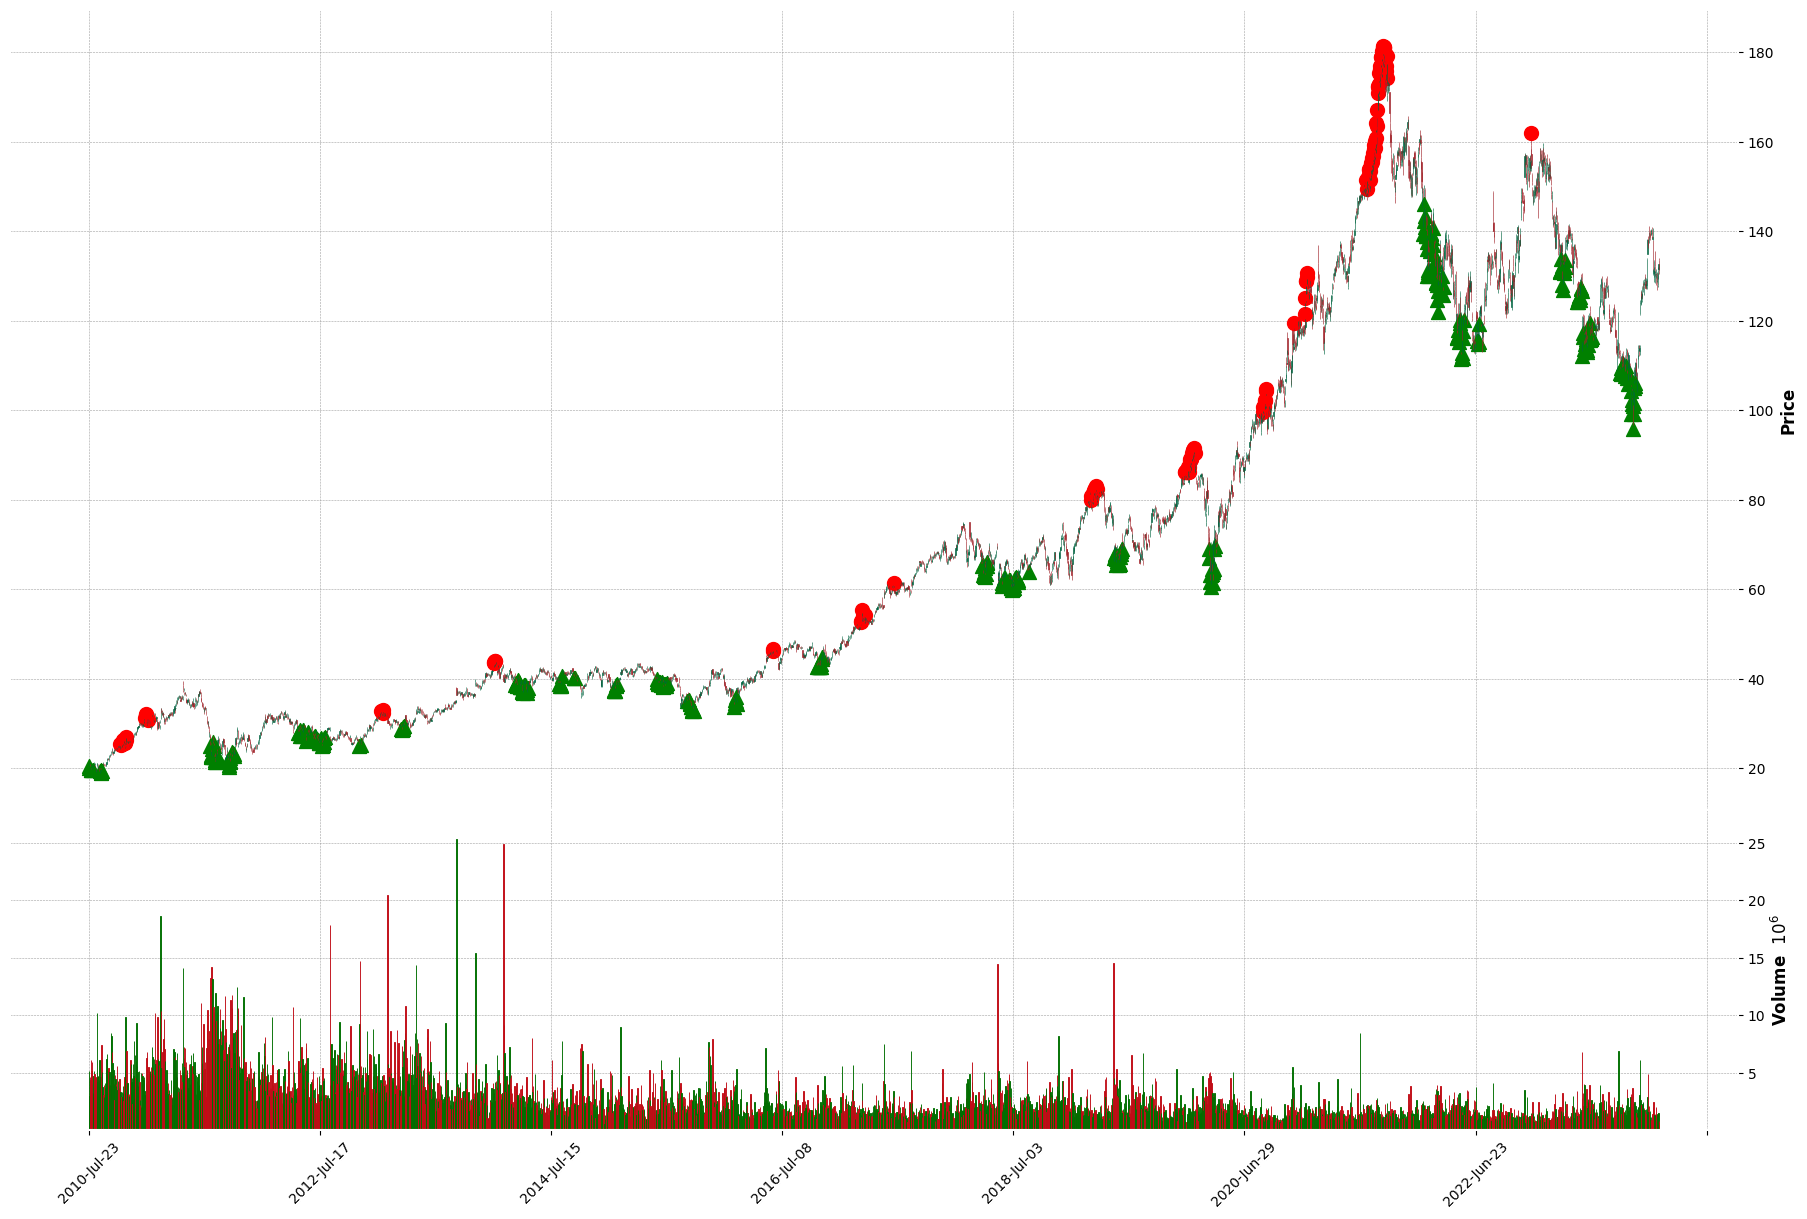

In [101]:
predictions_up_series = pd.Series(Y_up_prediction.flatten(), index=df.index)
buy_signals = np.full(df.shape[0], np.nan)  # 含 NaN 的数组，与 df 的长度一致
buy_signals[predictions_up_series > 0.78] = df['low'][predictions_up_series > 0.78] * 0.99
buy_markers = mpf.make_addplot(buy_signals, type='scatter', markersize=100, marker='^', color='g')

predictions_down_series = pd.Series(Y_down_prediction.flatten(), index=df.index)
sell_signals = np.full(df.shape[0], np.nan)  # 含 NaN 的数组，与 df 的长度一致
sell_signals[predictions_down_series > 0.78] = df['high'][predictions_down_series > 0.78] * 1.01
sell_markers = mpf.make_addplot(sell_signals, type='scatter', markersize=100, marker='o', color='r')

mpf.plot(df, type='candle', style='charles', addplot=[buy_markers, sell_markers], volume=True, figsize=(24, 16))